# Задача 4 

#### Постановка задачи

$X_1: ~ \alpha  \mathcal{N}(0,1) + (1-\alpha)\mathcal{N}(2, 4)$

$X_2: ~ \alpha  \mathcal{N}(0,1) + (1-\alpha)\mathcal{N}(2, 4) + \delta$

Оба распределения являются гауссовой смесью, где $\delta$ - сдвиг, дающий возможность разделить выборки X1 и X2.

$H_0: med(X1)=med(X2)$

$H_1: med(X1) \neq med(x2)$



#### План работы
1. Сгенерируем выборки и посмотри на получившиеся распределения.

2. Проверим мощность и консервативность критерия Уликоксона о равенстве медиан для данных выборок.

3. Рассмотрим их зависимости от $\alpha$ и $\delta$.


##### Импорт библиотек и генерация выборки

In [321]:
import numpy as np
import numpy.random
import scipy.stats as ss
import matplotlib.pyplot as plt

In [322]:
n = 1000 #size of the sample
n_comp = 2 #num of distributions in a mixture
norm_params = np.array([[0, 1],
                        [2, 4]]) #parametres of the distributions

In [323]:
def gaus_mix(alpha, delta, seed):
    np.random.seed(seed) 
    # различный seed понадобится дальше, когда будем генерировать несколько выборок, чтобы они были различными
    
    weights = [alpha, 1-alpha] #probability of each component 

    #indices

    mixture_idx1 = numpy.random.choice(n_comp, size=n, replace=True, p=weights)
    mixture_idx2 = numpy.random.choice(n_comp, size=n, replace=True, p=weights)

   
    #resulting gauss mixture
    return numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx1),
                          dtype=np.float64),numpy.fromiter((ss.norm.rvs(*(norm_params[i]))+delta for i in mixture_idx2),
                           dtype=np.float64)

Сгенерируем выборки $X_1$, $X_2$ для $\alpha=0.5$.

Рассмотрим их на графике, чтобы увидеть, с каким распределением мы работаем.

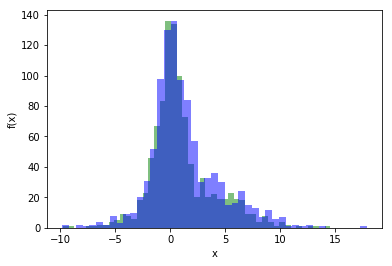

In [324]:
# Theoretical PDF plotting -- generate the x and y plotting positions
y1, y2 = gaus_mix(0.5, 0.15, 42)

xs1 = np.linspace(y1.min(), y1.max(), 200)
ys1 = np.zeros_like(xs1)
xs2 = np.linspace(y1.min(), y1.max(), 200)
ys2 = np.zeros_like(xs2)

plt.hist(y1, bins="fd", color = 'g',alpha = 0.5)
plt.hist(y2,  bins="fd", color = 'b', alpha =0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

##### Проверим мощность и консервативность

Посчитаем мощность и уровень значимость по определению.

Мощность: 

$P$(отвергнуть $H_0$|верна $H_1$)

Уровень значимости: 

$P$(отвергнуть $H_0$|верна $H_0$)

Если полученный уровень значимости критерия меньше заданного (0.01), критерий будем считать консервативным

In [325]:
def get_power_signific(alpha, delta):
    deniedh0 = 0 #denied h0 when h0 is true
    deniedh1 = 0 #denied h0 when h1 is true
    trueh = 0 #number of true h0 hypothesis
    nsamples = 50
    for i in range(0, nsamples):
        y1, y2 = gaus_mix(alpha, delta, i)
        if round(np.median(y1), 2)==round(np.median(y2),2): #true h0
            trueh = trueh + 1                #true h0 counter increase
            if ss.wilcoxon(y1, y2)[1]<0.01: #if with true h0 we deny it
                deniedh0 = deniedh0+1 
        else:
            if ss.wilcoxon(y1, y2)[1]<0.01:
                deniedh1 = deniedh1 + 1
    if trueh!=nsamples:
        power = deniedh1/(nsamples-trueh)
    else:
        power = 0 #'no true h1'
    if trueh!=0:
        signific = deniedh0/trueh
    else:
        signific = 0 #'no true h0'
    return power, signific

Для параметров, взятых выше в качестве примера ($\alpha = 0.5$, $\delta =0.15$) получим мощность и ошибку первого рода:

In [326]:
get_power_signific(0.5, 0.15)

(0.12, 0)

Таким образом, криитерий обладает небольшой мощностью, но является консервативным.

##### Рассмотрим зависимость мощности и консервативности от параметров 

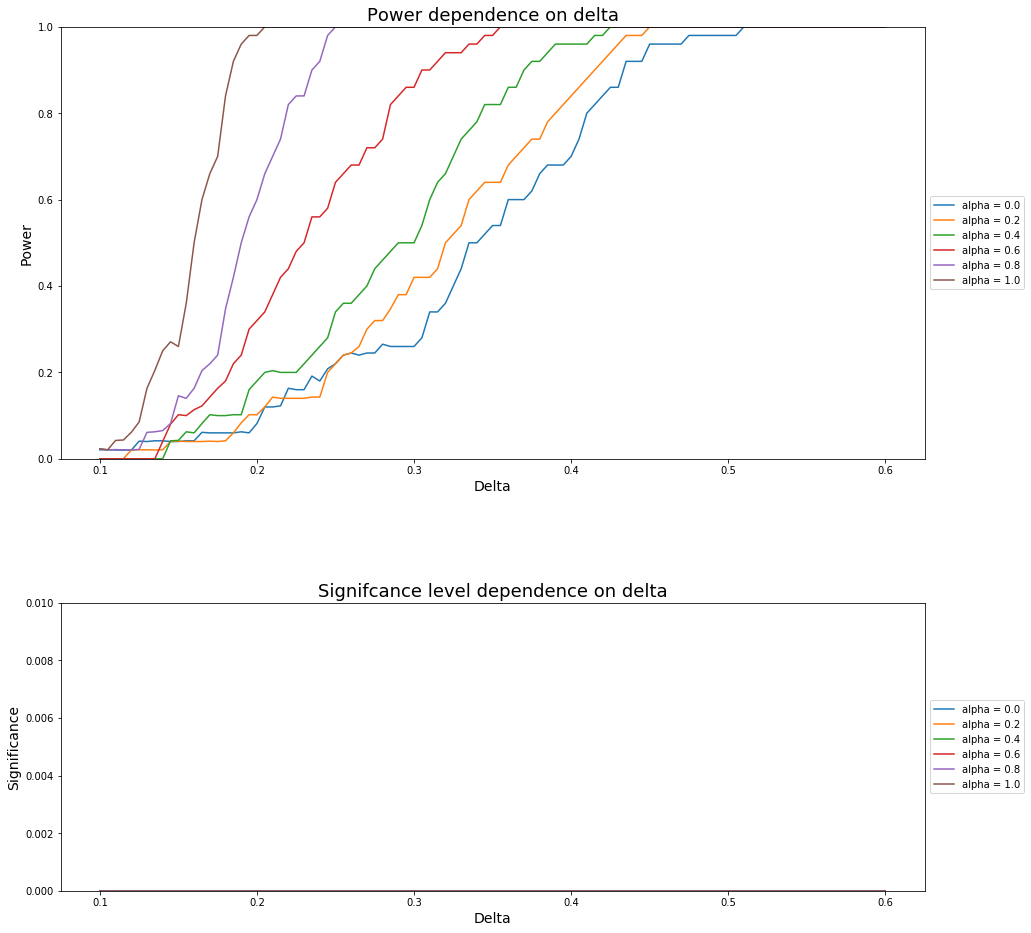

Wall time: 51min 49s


In [327]:
%%time
#for alpha in np.linspace(0, 1,11):
xsd = np.linspace(0, 1, 101) #delta interval
fig = plt.figure(figsize = (15, 20))
ax1 = fig.add_axes([0.1, 0.4, 0.8, 0.3], xticklabels=xsd[0::10], ylim=(0, 1))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.2], xticklabels=xsd[0::10], ylim=(0, 0.01) )
for alpha in np.linspace(0, 1, 6):
    y = [] #power
    z = [] #significance
    for delta in xsd:
        #print(alpha, delta)
        p1, s1 = get_power_signific(alpha, delta)
        y.append(p1)
        z.append(s1)
    ax1.plot(xsd, y, label='alpha = '+str(round(alpha,1)))
    ax2.plot(xsd, z, label = 'alpha = '+str(round(alpha, 1)))
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.set_xlabel('Delta', fontdict = {'fontsize': 14,
                                         'fontweight' : 2})
    ax2.set_xlabel('Delta', fontdict = {'fontsize': 14,
                                             'fontweight' : 2})
    ax1.set_ylabel('Power', fontdict = {'fontsize': 14,
                                             'fontweight' : 2})
    ax2.set_ylabel('Significance', fontdict = {'fontsize': 14,
                                           'fontweight' : 2})
    ax1.set_title('Power dependence on delta', fontdict = {'fontsize': 18,
                                             'fontweight' : 3})
    ax2.set_title('Signifcance level dependence on delta', fontdict = {'fontsize': 18,
                                             'fontweight' : 3})
fig.savefig('figure1.png') 
plt.show()

Из графиков выше видно, что критерий является консервативным. 

Мощность критерия в большей степени зависит от $\delta$, нежели от $\alpha$.

##### Вывод
Для гауссовых смесей вида, указанного в постановке задачи, критерий Уилкоксона является консервативным.
Однако мощность критерия не всегда является приемлемой для различных комбинаций $\alpha$ и $\delta$. Применять критерий нужно с дополниельными проверками.